In [ ]:
import numpy as np
import plotly.graph_objects as go
import utils
from utils import RADIATION_PATTERN_DEFAULTS, reference_antenna_pattern, UE_rotate, plot_3d_pattern, plot_patterns_on_phone

In [ ]:
# Create theta and phi angle arrays
theta_deg = np.linspace(0, 180, 181)     # Elevation angle θ″
phi_deg = np.linspace(-180, 180, 361)    # Azimuthal angle ϕ″
theta_rad = np.radians(theta_deg)
phi_rad = np.radians(phi_deg)
THETA_deg, PHI_deg = np.meshgrid(theta_deg, phi_deg)
THETA_rad, PHI_rad = np.meshgrid(theta_rad, phi_rad)

In [ ]:
A_ref_dB, F_theta_ref_lin, F_phi_ref_lin = reference_antenna_pattern(THETA_deg, PHI_deg, units="deg", boresight_to=(90.0, 0.0))

In [ ]:
plot_3d_pattern(THETA_rad, PHI_rad, A_ref_dB, units="dB", title="Total reference radiation pattern, A''")

In [ ]:
plot_3d_pattern(THETA_rad, PHI_rad, F_theta_ref_lin, units="lin", title="Theta-polarized component of reference pattern, F''_theta")

In [ ]:
plot_3d_pattern(THETA_rad, PHI_rad, F_phi_ref_lin, units="lin", title="Phi-polarized component of reference pattern, F''_phi")

Coordinate system:

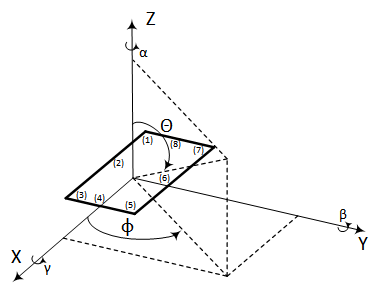

3D rotation angels per antenna port:
| Antenna #        | αᵤ   | βᵤ | γᵤ  |
|------------------|------|----|-----|
| 1                | -155°| 0° | 90° |
| 2                | -90° | 0° | 90° |
| 3                | -25° | 0° | 90° |
| 4                | 0°   | 0° | 90° |
| 5                | 25°  | 0° | 90° |
| 6                | 90°  | 0° | 90° |
| 7                | 155° | 0° | 90° |
| 8                | 180° | 0° | 90° |


UE rotation angles:
 - For calibration of handheld UT, the following UT rotation based on reference UT orientation is assumed.
     - For calibration with spatial non-stationarity modelling:
         - For one-hand blockage, ΩUT,α = 0 – 360 degrees, ΩUT,β = 45 degrees, ΩUT,γ = 0 degrees, 
         - For dual-hand blockage, ΩUT,α = 0 – 360 degrees, ΩUT,β = 0 degrees, ΩUT,γ = 45 degrees, 
         - For hand and head blockage, ΩUT,α = 0 – 360 degrees, ΩUT,β = 90 degrees, ΩUT,γ = 0 degrees, 
     - For all other cases:
         - ΩUT,α = 0 – 360 degrees, ΩUT,β = 45 degrees, ΩUT,γ = 0 degrees, 

In [ ]:
F_theta_final, F_phi_final, A_db_final = UE_rotate (THETA_rad, PHI_rad, 0, 0, 0, 25, 0, 90, (90,0)) # Rotation corresonding to the UE antenna port #5

In [ ]:
plot_3d_pattern(THETA_rad, PHI_rad, A_db_final, units="dB", title="Total radiation pattern of antenna, A'", index="'")

In [ ]:
plot_3d_pattern(THETA_rad, PHI_rad, F_theta_final, units="lin", title="Theta-polarized component, F'_theta", index="'")

In [ ]:
plot_3d_pattern(THETA_rad, PHI_rad, F_phi_final, units="lin", title="Phi-polarized component, F'_phi", index="'")

In [ ]:
# General parameters for multiple rotations for the 3GPP DEAFULT PATTERN ORIENTATION
alfa_ue = 0
betta_ue = 45
gamma_ue = 0
boresight_to = (90.0, 0.0) #(0.0, 0.0)- Up or (90.0, 0.0) - 3GPP default
betta_antenna_deg = 0
gamma_antenna_deg = 90

F_theta_1, F_phi_1, A_db_1 = UE_rotate (THETA_rad, PHI_rad, alfa_ue, betta_ue, gamma_ue, -155, betta_antenna_deg, gamma_antenna_deg, boresight_to)
F_theta_2, F_phi_2, A_db_2 = UE_rotate (THETA_rad, PHI_rad, alfa_ue, betta_ue, gamma_ue, -90, betta_antenna_deg, gamma_antenna_deg, boresight_to)
F_theta_3, F_phi_3, A_db_3 = UE_rotate (THETA_rad, PHI_rad, alfa_ue, betta_ue, gamma_ue, -25, betta_antenna_deg, gamma_antenna_deg, boresight_to)
F_theta_4, F_phi_4, A_db_4 = UE_rotate (THETA_rad, PHI_rad, alfa_ue, betta_ue, gamma_ue, 0, betta_antenna_deg, gamma_antenna_deg, boresight_to)
F_theta_5, F_phi_5, A_db_5 = UE_rotate (THETA_rad, PHI_rad, alfa_ue, betta_ue, gamma_ue, 25, betta_antenna_deg, gamma_antenna_deg, boresight_to)
F_theta_6, F_phi_6, A_db_6 = UE_rotate (THETA_rad, PHI_rad, alfa_ue, betta_ue, gamma_ue, 90, betta_antenna_deg, gamma_antenna_deg, boresight_to)
F_theta_7, F_phi_7, A_db_7 = UE_rotate (THETA_rad, PHI_rad, alfa_ue, betta_ue, gamma_ue, 155, betta_antenna_deg, gamma_antenna_deg, boresight_to)
F_theta_8, F_phi_8, A_db_8 = UE_rotate (THETA_rad, PHI_rad, alfa_ue, betta_ue, gamma_ue, 180, betta_antenna_deg, gamma_antenna_deg, boresight_to)
F_theta_list = [F_theta_1, F_theta_2, F_theta_3, F_theta_4,
          F_theta_5, F_theta_6, F_theta_7, F_theta_8]
F_phi_list = [F_phi_1, F_phi_2, F_phi_3, F_phi_4,
          F_phi_5, F_phi_6, F_phi_7, F_phi_8]
A_db_list = [A_db_1, A_db_2, A_db_3, A_db_4,
          A_db_5, A_db_6, A_db_7, A_db_8]

In [ ]:
plot_patterns_on_phone(
    A_db_list,
    THETA_rad, PHI_rad,
    units="dB",
    rect_size=(15.0, 7.0),
    angles_deg=(alfa_ue, betta_ue, gamma_ue),  # e.g., (45, 0, 0)
    lobe_scale=4,          # tweak visual size of the lobes
    cmin=-20, cmax=5.5,      # dB scale
    colorscale='Turbo',
    title="Total radiation patterns for 8 candidate locations,<br>" \
    "handheld device, 15×7 cm"
)

In [ ]:
plot_patterns_on_phone(
    F_theta_list,
    THETA_rad, PHI_rad,
    units="lin",
    rect_size=(15.0, 7.0),
    angles_deg=(alfa_ue, betta_ue, gamma_ue),  # (alfa_ue, betta_ue, gamma_ue)
    lobe_scale=4,          # tweak visual size of the lobes
    cmin=-20, cmax=5.5,      # dB scale
    colorscale='Turbo',
    title="F_theta polarization components for 8 candidate locations,<br>" \
    "handheld device, 15×7 cm"
)

In [ ]:
plot_patterns_on_phone(
    F_phi_list,
    THETA_rad, PHI_rad,
    units="lin",
    rect_size=(15.0, 7.0),
    angles_deg=(alfa_ue, betta_ue, gamma_ue),  # e.g., (45, 0, 0)
    lobe_scale=4,          # tweak visual size of the lobes
    cmin=-20, cmax=5.5,      # dB scale
    colorscale='Turbo',
    title="F_phi polarization components for 8 candidate locations,<br>" \
    "handheld device, 15×7 cm"
)